 Path in 1D BZ defined by nodes at [0.  0.5 1. ]



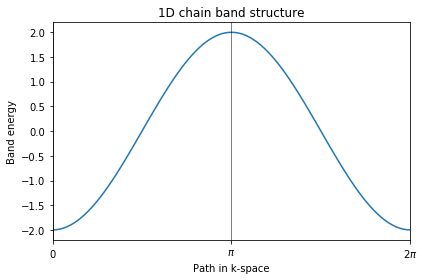

In [1]:
#!/usr/bin/env python

# one dimensional chain

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from pythtb import * # import TB model class
import matplotlib.pyplot as plt

# specify model
lat=[[1.0]]
orb=[[0.0]]
my_model=tb_model(1,1,lat,orb)
my_model.set_hop(-1., 0, 0, [1])

# define a path in k-space
(k_vec,k_dist,k_node)=my_model.k_path('full',100)
k_label=[r"$0$",r"$\pi$", r"$2\pi$"]

# solve model
evals=my_model.solve_all(k_vec)

# plot band structure
fig, ax = plt.subplots()
ax.plot(k_dist,evals[0])
ax.set_title("1D chain band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
ax.set_xlim(k_node[0],k_node[-1])
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')
fig.tight_layout()


---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     1.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,     0.5 ]
site energies:
 #  0  ===>      -1.1
 #  1  ===>       1.1
hoppings:
<  1 | H |  0 + [  0 ,  0 ] >     ===>      0.6 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>      0.6 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>      0.6 +     0.0 i
<  1 | H |  0 + [  1 ,  1 ] >     ===>      0.6 +     0.0 i
hopping distances:
|  pos(  1 )  - pos(  0 + [  0 ,  0 ] ) |  =    0.7071
|  pos(  1 )  - pos(  0 + [  1 ,  0 ] ) |  =    0.7071
|  pos(  1 )  - pos(  0 + [  0 ,  1 ] ) |  =    0.7071
|  pos(  1 )  - pos(

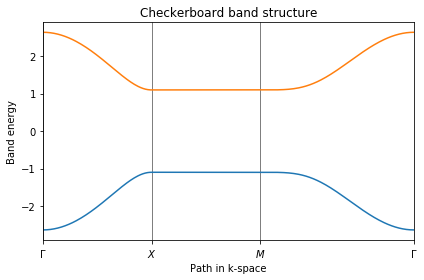

In [2]:
#!/usr/bin/env python

# two dimensional tight-binding checkerboard model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0],[0.0,1.0]]
# define coordinates of orbitals
orb=[[0.0,0.0],[0.5,0.5]]

# make two dimensional tight-binding checkerboard model
my_model=tb_model(2,2,lat,orb)

# set model parameters
delta=1.1
t=0.6

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 1, 0, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])
my_model.set_hop(t, 1, 0, [1, 1])

# print tight-binding model
my_model.display()

# generate k-point path and labels
path=[[0.0,0.0],[0.0,0.5],[0.5,0.5],[0.0,0.0]]
label=(r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')
(k_vec,k_dist,k_node)=my_model.k_path(path,301)

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# solve for eigenenergies of hamiltonian on
# the set of k-points from above
evals=my_model.solve_all(k_vec)

# plotting of band structure
print('Plotting bandstructure...')

# First make a figure object
fig, ax = plt.subplots()

# specify horizontal axis details
ax.set_xlim(k_node[0],k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')

# plot bands
for n in range(2):
  ax.plot(k_dist,evals[n])
# put title
ax.set_title("Checkerboard band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
# make an PDF figure of a plot
fig.tight_layout()


print('Done.\n')

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 1
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     2.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     1.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,     1.0 ]
site energies:
 #  0  ===>       0.0
 #  1  ===>       0.0
hoppings:
<  0 | H |  0 + [  1 ,  0 ] >     ===>      2.0 +     0.0 i
<  1 | H |  1 + [  1 ,  0 ] >     ===>      2.0 +     0.0 i
<  0 | H |  1 + [  0 ,  0 ] >     ===>      0.8 +     0.6 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>      0.8 +     0.6 i
hopping distances:
|  pos(  0 )  - pos(  0 + [  1 ,  0 ] ) |  =       2.0
|  pos(  1 )  - pos(  1 + [  1 ,  0 ] ) |  =       2.0
|  pos(  0 )  - pos(  1 + [  0 ,  0 ] ) |  =    1.4142
|  pos(  1 )  - pos(  0

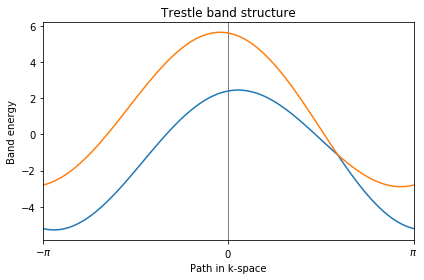

In [3]:
#!/usr/bin/env python

# one dimensional tight-binding model of a trestle-like structure

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[2.0,0.0],[0.0,1.0]]
# define coordinates of orbitals
orb=[[0.0,0.0],[0.5,1.0]]

# make one dimensional tight-binding model of a trestle-like structure
my_model=tb_model(1,2,lat,orb,per=[0])

# set model parameters
t_first=0.8+0.6j
t_second=2.0

# leave on-site energies to default zero values
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t_second, 0, 0, [1,0])
my_model.set_hop(t_second, 1, 1, [1,0])
my_model.set_hop(t_first, 0, 1, [0,0])
my_model.set_hop(t_first, 1, 0, [1,0])

# print tight-binding model
my_model.display()

# generate list of k-points following some high-symmetry line in
(k_vec,k_dist,k_node)=my_model.k_path('fullc',100)
k_label=[r"$-\pi$",r"$0$", r"$\pi$"]

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# solve for eigenenergies of hamiltonian on
# the set of k-points from above
evals=my_model.solve_all(k_vec)

# plotting of band structure
print('Plotting bandstructure...')

# First make a figure object
fig, ax = plt.subplots()
# specify horizontal axis details
ax.set_xlim(k_node[0],k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
ax.axvline(x=k_node[1],linewidth=0.5, color='k')

# plot first band
ax.plot(k_dist,evals[0])
# plot second band
ax.plot(k_dist,evals[1])
# put title
ax.set_title("Trestle band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
# make an PDF figure of a plot
fig.tight_layout()


print('Done.\n')

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 0
r-space dimension           = 3
number of spin components   = 1
periodic directions         = []
number of orbitals          = 4
number of electronic states = 4
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     1.0 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,     1.0 ]
positions of orbitals:
 #  0  ===>  [  0.5774 ,     0.0 ,     0.0 ]
 #  1  ===>  [ -0.2887 ,     0.5 ,     0.0 ]
 #  2  ===>  [ -0.2887 ,    -0.5 ,     0.0 ]
 #  3  ===>  [     0.0 ,     0.0 ,     1.0 ]
site energies:
 #  0  ===>      -0.5
 #  1  ===>      -0.5
 #  2  ===>      -0.5
 #  3  ===>       0.5
hoppings:
<  0 | H |  1 >     ===>      1.0 +     0.0 i
<  0 | H |  2 >     ===>      1.0 +     0.0 i
<  0 | H |  3 >     ===>      1.0 +     0.0 i
<  1 | H |  2 >     ===>      1.0 +     0.0 i
<  1 | H |  3 >     ===>      1.0 +     0.0 i

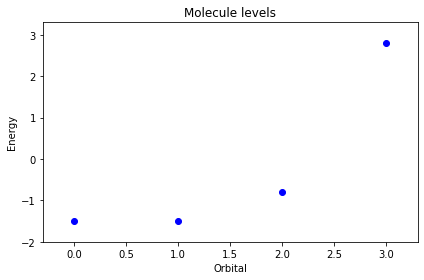

In [4]:
#!/usr/bin/env python

# zero dimensional tight-binding model of a NH3 molecule

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]]
# define coordinates of orbitals
sq32=np.sqrt(3.0)/2.0
orb=[[ (2./3.)*sq32, 0.   ,0.],
     [(-1./3.)*sq32, 1./2.,0.],
     [(-1./3.)*sq32,-1./2.,0.],
     [  0.         , 0.   ,1.]]
# make zero dimensional tight-binding model
my_model=tb_model(0,3,lat,orb)

# set model parameters
delta=0.5
t_first=1.0

# change on-site energies so that N and H don't have the same energy
my_model.set_onsite([-delta,-delta,-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j)
my_model.set_hop(t_first, 0, 1)
my_model.set_hop(t_first, 0, 2)
my_model.set_hop(t_first, 0, 3)
my_model.set_hop(t_first, 1, 2)
my_model.set_hop(t_first, 1, 3)
my_model.set_hop(t_first, 2, 3)

# print tight-binding model
my_model.display()

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')
print()
print('Band energies')
print()
# solve for eigenenergies of hamiltonian
evals=my_model.solve_all()

# First make a figure object
fig, ax = plt.subplots()
# plot all states
ax.plot(evals,"bo")
ax.set_xlim(-0.3,3.3)
ax.set_ylim(evals.min()-0.5,evals.max()+0.5)
# put title
ax.set_title("Molecule levels")
ax.set_xlabel("Orbital")
ax.set_ylabel("Energy")
# make an PDF figure of a plot
fig.tight_layout()


print('Done.\n')

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>      -0.0
 #  1  ===>       0.0
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  0 ,  1 ] ) |  =    0.5774

----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.  

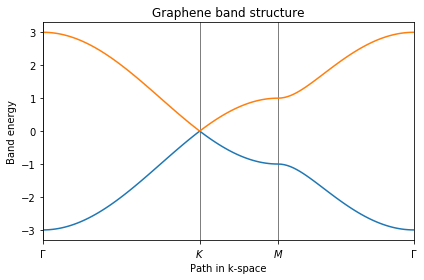

In [5]:
#!/usr/bin/env python

# Toy graphene model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding graphene model
my_model=tb_model(2,2,lat,orb)

# set model parameters
delta=0.0
t=-1.0

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])

# print tight-binding model
my_model.display()

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.],[2./3.,1./3.],[.5,.5],[0.,0.]]
# labels of the nodes
label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)
# inputs:
#   path, nk: see above
#   my_model: the pythtb model
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec)

# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("Graphene band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])

# make an PDF figure of a plot
fig.tight_layout()


print('Done.\n')

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>       0.1
 #  1  ===>      -0.1
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  0 ,  1 ] ) |  =    0.5774

Berry phase along circle with radius:  0.05
  centered at k-point:  [0.33333333

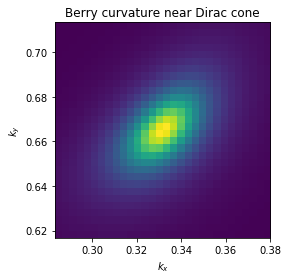

In [6]:
#!/usr/bin/env python

# Compute Berry phase around Dirac cone in
# graphene with staggered onsite term delta

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding graphene model
my_model=tb_model(2,2,lat,orb)

# set model parameters
delta=-0.1 # small staggered onsite term
t=-1.0

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])

# print tight-binding model
my_model.display()

# construct circular path around Dirac cone
#   parameters of the path
circ_step=31
circ_center=np.array([1.0/3.0,2.0/3.0])
circ_radius=0.05
# one-dimensional wf_array to store wavefunctions on the path
w_circ=wf_array(my_model,[circ_step])
# now populate array with wavefunctions
for i in range(circ_step):
    # construct k-point coordinate on the path
    ang=2.0*np.pi*float(i)/float(circ_step-1)
    kpt=np.array([np.cos(ang)*circ_radius,np.sin(ang)*circ_radius])
    kpt+=circ_center
    # find eigenvectors at this k-point
    (eval,evec)=my_model.solve_one(kpt,eig_vectors=True)
    # store eigenvector into wf_array object
    w_circ[i]=evec
# make sure that first and last points are the same
w_circ[-1]=w_circ[0]

# compute Berry phase along circular path
print("Berry phase along circle with radius: ",circ_radius)
print("  centered at k-point: ",circ_center)
print("  for band 0 equals    : ", w_circ.berry_phase([0],0))
print("  for band 1 equals    : ", w_circ.berry_phase([1],0))
print("  for both bands equals: ", w_circ.berry_phase([0,1],0))
print()

# construct two-dimensional square patch covering the Dirac cone
#  parameters of the patch
square_step=31
square_center=np.array([1.0/3.0,2.0/3.0])
square_length=0.1
# two-dimensional wf_array to store wavefunctions on the path
w_square=wf_array(my_model,[square_step,square_step])
all_kpt=np.zeros((square_step,square_step,2))
# now populate array with wavefunctions
for i in range(square_step):
    for j in range(square_step):
        # construct k-point on the square patch
        kpt=np.array([square_length*(-0.5+float(i)/float(square_step-1)),
                      square_length*(-0.5+float(j)/float(square_step-1))])
        kpt+=square_center
        # store k-points for plotting
        all_kpt[i,j,:]=kpt
        # find eigenvectors at this k-point
        (eval,evec)=my_model.solve_one(kpt,eig_vectors=True)
        # store eigenvector into wf_array object
        w_square[i,j]=evec

# compute Berry flux on this square patch
print("Berry flux on square patch with length: ",square_length)
print("  centered at k-point: ",square_center)
print("  for band 0 equals    : ", w_square.berry_flux([0]))
print("  for band 1 equals    : ", w_square.berry_flux([1]))
print("  for both bands equals: ", w_square.berry_flux([0,1]))
print()

# also plot Berry phase on each small plaquette of the mesh
plaq=w_square.berry_flux([0],individual_phases=True)
#
fig, ax = plt.subplots()
ax.imshow(plaq.T,origin="lower",
          extent=(all_kpt[0,0,0],all_kpt[-2, 0,0],
                  all_kpt[0,0,1],all_kpt[ 0,-2,1],))
ax.set_title("Berry curvature near Dirac cone")
ax.set_xlabel(r"$k_x$")
ax.set_ylabel(r"$k_y$")
fig.tight_layout()


print('Done.\n')

Berry flux in k-lambda space:  -6.283185307179586
Done.



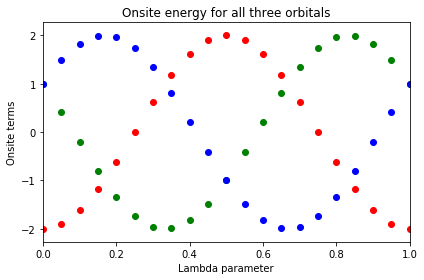

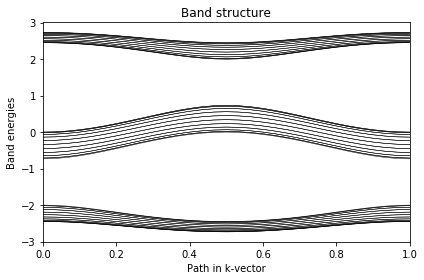

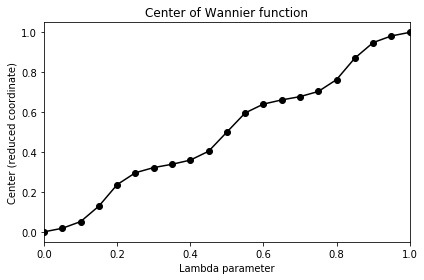

In [7]:
#!/usr/bin/env python

# one-dimensional family of tight binding models
# parametrized by one parameter, lambda

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0]]
# define coordinates of orbitals
orb=[[0.0],[1.0/3.0],[2.0/3.0]]

# make one dimensional tight-binding model
my_model=tb_model(1,1,lat,orb)

# set model parameters
delta=2.0
t=-1.0

# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [0])
my_model.set_hop(t, 1, 2, [0])
my_model.set_hop(t, 2, 0, [1])

# plot onsite terms for each site
fig_onsite, ax_onsite = plt.subplots()
# plot band structure for each lambda
fig_band,   ax_band   = plt.subplots()

# evolve tight-binding parameter along some path by
# performing a change of onsite terms
#   how many steps to take along the path (including end points)
path_steps=21
#   create lambda mesh from 0.0 to 1.0 (21 values and 20 intervals)
all_lambda=np.linspace(0.0,1.0,path_steps,endpoint=True)
#   how many k-points to use (31 values and 30 intervals)
num_kpt=31
# two-dimensional wf_array in which we will store wavefunctions
# for all k-points and all values of lambda.  (note that the index
# order [k,lambda] is important for interpreting the sign.)
wf_kpt_lambda=wf_array(my_model,[num_kpt,path_steps])
for i_lambda in range(path_steps):
    # for each step along the path compute onsite terms for each orbital
    lmbd=all_lambda[i_lambda]
    onsite_0=delta*(-1.0)*np.cos(2.0*np.pi*(lmbd-0.0/3.0))
    onsite_1=delta*(-1.0)*np.cos(2.0*np.pi*(lmbd-1.0/3.0))
    onsite_2=delta*(-1.0)*np.cos(2.0*np.pi*(lmbd-2.0/3.0))

    # update onsite terms by rewriting previous values
    my_model.set_onsite([onsite_0,onsite_1,onsite_2],mode="reset")

    # create k mesh over 1D Brillouin zone
    (k_vec,k_dist,k_node)=my_model.k_path([[-0.5],[0.5]],num_kpt,report=False)
    # solve model on all of these k-points
    (eval,evec)=my_model.solve_all(k_vec,eig_vectors=True)
    # store wavefunctions (eigenvectors)
    for i_kpt in range(num_kpt):
        wf_kpt_lambda[i_kpt,i_lambda]=evec[:,i_kpt,:]

    # plot on-site terms
    ax_onsite.scatter([lmbd],[onsite_0],c="r")
    ax_onsite.scatter([lmbd],[onsite_1],c="g")
    ax_onsite.scatter([lmbd],[onsite_2],c="b")
    # plot band structure for all three bands
    for band in range(eval.shape[0]):
        ax_band.plot(k_dist,eval[band,:],"k-",linewidth=0.5)

# impose periodic boundary condition along k-space direction only
# (so that |psi_nk> at k=0 and k=1 have the same phase)
wf_kpt_lambda.impose_pbc(0,0)

# compute Berry phase along k-direction for each lambda
phase=wf_kpt_lambda.berry_phase([0],0)

# plot position of Wannier function for bottom band
fig_wann, ax_wann = plt.subplots()
# wannier center in reduced coordinates
wann_center=phase/(2.0*np.pi)
# plot wannier centers
ax_wann.plot(all_lambda,wann_center,"ko-")

# compute integrated curvature
final=wf_kpt_lambda.berry_flux([0])
print("Berry flux in k-lambda space: ",final)

# finish plot of onsite terms
ax_onsite.set_title("Onsite energy for all three orbitals")
ax_onsite.set_xlabel("Lambda parameter")
ax_onsite.set_ylabel("Onsite terms")
ax_onsite.set_xlim(0.0,1.0)
fig_onsite.tight_layout()
fig_onsite.savefig("3site_onsite.pdf")
# finish plot for band structure
ax_band.set_title("Band structure")
ax_band.set_xlabel("Path in k-vector")
ax_band.set_ylabel("Band energies")
ax_band.set_xlim(0.0,1.0)
fig_band.tight_layout()
fig_band.savefig("3site_band.pdf")
# finish plot for Wannier center
ax_wann.set_title("Center of Wannier function")
ax_wann.set_xlabel("Lambda parameter")
ax_wann.set_ylabel("Center (reduced coordinate)")
ax_wann.set_xlim(0.0,1.0)
fig_wann.tight_layout()


print('Done.\n')

Chern numbers for rising fillings
  Band  0     =  1.00
  Bands 0,1   = -1.00
  Bands 0,1,2 = -0.00

Chern numbers for individual bands
  Band  0 =  1.00
  Band  1 = -2.00
  Band  2 =  1.00



TypeError: tight_layout() got an unexpected keyword argument 'size'

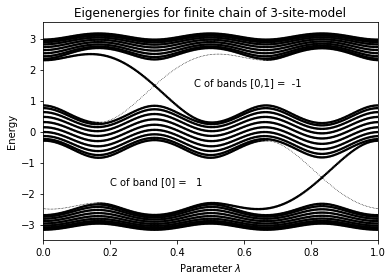

In [13]:
#!/usr/bin/env python

# one-dimensional family of tight binding models
# parametrized by one parameter, lambda

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define function to construct model
def set_model(t,delta,lmbd):
    lat=[[1.0]]
    orb=[[0.0],[1.0/3.0],[2.0/3.0]]
    model=tb_model(1,1,lat,orb)
    model.set_hop(t, 0, 1, [0])
    model.set_hop(t, 1, 2, [0])
    model.set_hop(t, 2, 0, [1])
    onsite_0=delta*(-1.0)*np.cos(2.0*np.pi*(lmbd-0.0/3.0))
    onsite_1=delta*(-1.0)*np.cos(2.0*np.pi*(lmbd-1.0/3.0))
    onsite_2=delta*(-1.0)*np.cos(2.0*np.pi*(lmbd-2.0/3.0))
    model.set_onsite([onsite_0,onsite_1,onsite_2])
    return(model)

# set model parameters
delta=2.0
t=-1.3

# evolve tight-binding parameter lambda along a path
path_steps=21
all_lambda=np.linspace(0.0,1.0,path_steps,endpoint=True)

# get model at arbitrary lambda for initializations
my_model=set_model(t,delta,0.)

# set up 1d Brillouin zone mesh
num_kpt=31
(k_vec,k_dist,k_node)=my_model.k_path([[-0.5],[0.5]],num_kpt,report=False)

# two-dimensional wf_array in which we will store wavefunctions
# we store it in the order [lambda,k] since want Berry curvatures
#   and Chern numbers defined with the [lambda,k] sign convention
wf_kpt_lambda=wf_array(my_model,[path_steps,num_kpt])

# fill the array with eigensolutions
for i_lambda in range(path_steps):
    lmbd=all_lambda[i_lambda]
    my_model=set_model(t,delta,lmbd)
    (eval,evec)=my_model.solve_all(k_vec,eig_vectors=True)
    for i_kpt in range(num_kpt):
        wf_kpt_lambda[i_lambda,i_kpt]=evec[:,i_kpt,:]

# compute integrated curvature
print("Chern numbers for rising fillings")
print("  Band  0     = %5.2f" % (wf_kpt_lambda.berry_flux([0])/(2.*np.pi)))
print("  Bands 0,1   = %5.2f" % (wf_kpt_lambda.berry_flux([0,1])/(2.*np.pi)))
print("  Bands 0,1,2 = %5.2f" % (wf_kpt_lambda.berry_flux([0,1,2])/(2.*np.pi)))
print("")
print("Chern numbers for individual bands")
print("  Band  0 = %5.2f" % (wf_kpt_lambda.berry_flux([0])/(2.*np.pi)))
print("  Band  1 = %5.2f" % (wf_kpt_lambda.berry_flux([1])/(2.*np.pi)))
print("  Band  2 = %5.2f" % (wf_kpt_lambda.berry_flux([2])/(2.*np.pi)))
print("")

# for annotating plot with text
text_lower="C of band [0] = %3.0f" % (wf_kpt_lambda.berry_flux([0])/(2.*np.pi))
text_upper="C of bands [0,1] = %3.0f" % (wf_kpt_lambda.berry_flux([0,1])/(2.*np.pi))

# now loop over parameter again, this time for finite chains
path_steps=241
all_lambda=np.linspace(0.0,1.0,path_steps,endpoint=True)

# length of chain, in unit cells
num_cells=10
num_orb=3*num_cells

# initialize array for chain eigenvalues and x expectations
ch_eval=np.zeros([num_orb,path_steps],dtype=float)
ch_xexp=np.zeros([num_orb,path_steps],dtype=float)

for i_lambda in range(path_steps):
    lmbd=all_lambda[i_lambda]

    # construct and solve model
    my_model=set_model(t,delta,lmbd)
    ch_model=my_model.cut_piece(num_cells,0)
    (eval,evec)=ch_model.solve_all(eig_vectors=True)

    # save eigenvalues
    ch_eval[:,i_lambda]=eval
    ch_xexp[:,i_lambda]=ch_model.position_expectation(evec,0)

# plot eigenvalues vs. lambda
# symbol size is reduced for states localized near left end

(fig, ax) = plt.subplots()

# loop over "bands"
for n in range(num_orb):
    # diminish the size of the ones on the borderline
    xcut=2.   # discard points below this
    xfull=4.  # use sybols of full size above this
    size=(ch_xexp[n,:]-xcut)/(xfull-xcut)
    for i in range(path_steps):
        size[i]=min(size[i],1.)
        size[i]=max(size[i],0.1)
    ax.scatter(all_lambda[:],ch_eval[n,:], edgecolors='none', s=size*6., c='k')

# annotate gaps with bulk Chern numbers calculated earlier
ax.text(0.20,-1.7,text_lower)
ax.text(0.45, 1.5,text_upper)

ax.set_title("Eigenenergies for finite chain of 3-site-model")
ax.set_xlabel(r"Parameter $\lambda$")
ax.set_ylabel("Energy")
ax.set_xlim(0.,1.)

fig.tight_layout()


print('Done.\n')

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>      -0.0
 #  1  ===>       0.0
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i
<  0 | H |  0 + [  1 ,  0 ] >     ===>      0.0 +    0.15 i
<  1 | H |  1 + [  1 , -1 ] >     ===>      0.0 +    0.15 i
<  1 | H |  1 + [  0 ,  1 ] >     ===>      0.0 +    0.15 i
<  1 | H |  1 + [  1 ,  0 ] >     ===>      0.0 -    0.15 i
<  0 | H |  0 + [  1 , -

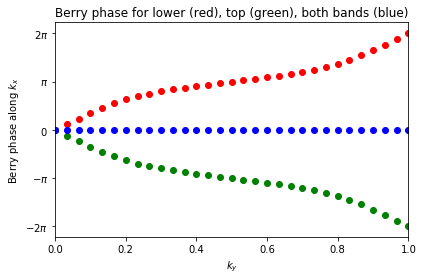

In [14]:
#!/usr/bin/env python

# Haldane model from Phys. Rev. Lett. 61, 2015 (1988)
# Calculates Berry phases and curvatures for this model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding Haldane model
my_model=tb_model(2,2,lat,orb)

# set model parameters
delta=0.0
t=-1.0
t2 =0.15*np.exp((1.j)*np.pi/2.)
t2c=t2.conjugate()

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])
# add second neighbour complex hoppings
my_model.set_hop(t2 , 0, 0, [ 1, 0])
my_model.set_hop(t2 , 1, 1, [ 1,-1])
my_model.set_hop(t2 , 1, 1, [ 0, 1])
my_model.set_hop(t2c, 1, 1, [ 1, 0])
my_model.set_hop(t2c, 0, 0, [ 1,-1])
my_model.set_hop(t2c, 0, 0, [ 0, 1])

# print tight-binding model details
my_model.display()

print(r"Using approach #1")
# approach #1
# generate object of type wf_array that will be used for
# Berry phase and curvature calculations
my_array_1=wf_array(my_model,[31,31])
# solve model on a regular grid, and put origin of
# Brillouin zone at -1/2 -1/2 point
my_array_1.solve_on_grid([-0.5,-0.5])

# calculate Berry phases around the BZ in the k_x direction
# (which can be interpreted as the 1D hybrid Wannier center
# in the x direction) and plot results as a function of k_y
#
# Berry phases along k_x for lower band
phi_a_1 = my_array_1.berry_phase([0],0,contin=True)
# Berry phases along k_x for upper band
phi_b_1 = my_array_1.berry_phase([1],0,contin=True)
# Berry phases along k_x for both bands
phi_c_1 = my_array_1.berry_phase([0,1],0,contin=True)

# Berry flux for lower band
flux_a_1=my_array_1.berry_flux([0])

# plot Berry phases
fig, ax = plt.subplots()
ky=np.linspace(0.,1.,len(phi_a_1))
ax.plot(ky,phi_a_1, 'ro')
ax.plot(ky,phi_b_1, 'go')
ax.plot(ky,phi_c_1, 'bo')
ax.set_title("Berry phase for lower (red), top (green), both bands (blue)")
ax.set_xlabel(r"$k_y$")
ax.set_ylabel(r"Berry phase along $k_x$")
ax.set_xlim(0.,1.)
ax.set_ylim(-7.,7.)
ax.yaxis.set_ticks([-2.*np.pi,-np.pi,0.,np.pi,2.*np.pi])
ax.set_yticklabels((r'$-2\pi$',r'$-\pi$',r'$0$',r'$\pi$', r'$2\pi$'))
fig.tight_layout()
# print out info about flux
print(" Berry flux= ",flux_a_1)

print(r"Using approach #2")
# approach #2
# do the same thing as in approach #1 but do not use
# automated solver
#
# intialize k-space mesh
nkx=31
nky=31
kx=np.linspace(-0.5,0.5,num=nkx)
ky=np.linspace(-0.5,0.5,num=nky)
# initialize object to store all wavefunctions
my_array_2=wf_array(my_model,[nkx,nky])
# solve model at all k-points
for i in range(nkx):
    for j in range(nky):
        (eval,evec)=my_model.solve_one([kx[i],ky[j]],eig_vectors=True)
        # store wavefunctions
        my_array_2[i,j]=evec
# impose periodic boundary conditions in both k_x and k_y directions
my_array_2.impose_pbc(0,0)
my_array_2.impose_pbc(1,1)
# calculate Berry flux for lower band
flux_a_2=my_array_2.berry_flux([0])

# print out info about curvature
print(" Berry flux= ",flux_a_2)

print('Done.\n')

Done.



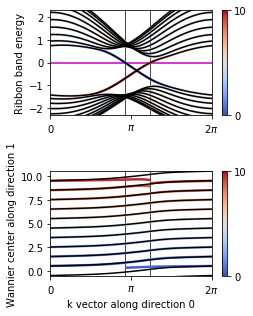

In [17]:
#!/usr/bin/env python

# Haldane model from Phys. Rev. Lett. 61, 2015 (1988)
# First, compute bulk Wannier centers along direction 1
# Then, cut a ribbon that extends along direcion 0, and compute
#   both the edge states and the finite hybrid Wannier centers
#   along direction 1.

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# set model parameters
delta=-0.2
t=-1.0
t2 =0.05-0.15j
t2c=t2.conjugate()

# Fermi level, relevant for edge states of ribbon
efermi=0.25

# define lattice vectors and orbitals and make model
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
orb=[[1./3.,1./3.],[2./3.,2./3.]]
my_model=tb_model(2,2,lat,orb)

# set on-site energies and hoppings
my_model.set_onsite([-delta,delta])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])
my_model.set_hop(t2 , 0, 0, [ 1, 0])
my_model.set_hop(t2 , 1, 1, [ 1,-1])
my_model.set_hop(t2 , 1, 1, [ 0, 1])
my_model.set_hop(t2c, 1, 1, [ 1, 0])
my_model.set_hop(t2c, 0, 0, [ 1,-1])
my_model.set_hop(t2c, 0, 0, [ 0, 1])

# number of discretized sites or k-points in the mesh in directions 0 and 1
len_0=100
len_1=10

# compute Berry phases in direction 1 for the bottom band
my_array=wf_array(my_model,[len_0,len_1])
my_array.solve_on_grid([0.0,0.0])
phi_1=my_array.berry_phase(occ=[0], dir=1, contin=True)

# create Haldane ribbon that is finite along direction 1
ribbon_model=my_model.cut_piece(len_1, fin_dir=1, glue_edgs=False)
(k_vec,k_dist,k_node)=ribbon_model.k_path([0.0, 0.5, 1.0],len_0,report=False)
k_label=[r"$0$",r"$\pi$", r"$2\pi$"]

# solve ribbon model to get eigenvalues and eigenvectors
(rib_eval,rib_evec)=ribbon_model.solve_all(k_vec,eig_vectors=True)
# shift bands so that the fermi level is at zero energy
rib_eval-=efermi

# find k-points at which number of states below the Fermi level changes
jump_k=[]
for i in range(rib_eval.shape[1]-1):
  nocc_i =np.sum(rib_eval[:,i]<0.0)
  nocc_ip=np.sum(rib_eval[:,i+1]<0.0)
  if nocc_i!=nocc_ip:
    jump_k.append(i)

# plot expectation value of position operator for states in the ribbon
# and hybrid Wannier function centers
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(3.7,4.5))

# plot bandstructure of the ribbon
for n in range(rib_eval.shape[0]):
  ax1.plot(k_dist,rib_eval[n,:],c='k', zorder=-50)

# color bands according to expectation value of y operator (red=top, blue=bottom)
for i in range(rib_evec.shape[1]):
  # get expectation value of the position operator for states at i-th kpoint
  pos_exp=ribbon_model.position_expectation(rib_evec[:,i],dir=1)

  # plot states according to the expectation value
  s=ax1.scatter([k_vec[i]]*rib_eval.shape[0], rib_eval[:,i], c=pos_exp, s=7,
                marker='o', cmap="coolwarm", edgecolors='none', vmin=0.0, vmax=float(len_1), zorder=-100)

# color scale
fig.colorbar(s,None,ax1,ticks=[0.0,float(len_1)])

# plot Fermi energy
ax1.axhline(0.0,c='m',zorder=-200)

# vertical lines show crossings of surface bands with Fermi energy
for ax in [ax1,ax2]:
  for i in jump_k:
    ax.axvline(x=(k_vec[i]+k_vec[i+1])/2.0, linewidth=0.7, color='k',zorder=-150)

# tweaks
ax1.set_ylabel("Ribbon band energy")
ax1.set_ylim(-2.3,2.3)

# bottom plot shows Wannier center flow
#   bulk Wannier centers in green lines
#   finite-ribbon Wannier centers in black dots
# compare with Fig 3 in Phys. Rev. Lett. 102, 107603 (2009)

# plot bulk hybrid Wannier center positions and their periodic images
for j in range(-1,len_1+1):
    ax2.plot(k_vec,float(j)+phi_1/(2.0*np.pi),'k-',zorder=-50)

# plot finite centers of ribbon along direction 1
for i in range(rib_evec.shape[1]):
  # get occupied states only (those below Fermi level)
  occ_evec=rib_evec[rib_eval[:,i]<0.0,i]
  # get centers of hybrid wannier functions
  hwfc=ribbon_model.position_hwf(occ_evec,1)
  # plot centers
  s=ax2.scatter([k_vec[i]]*hwfc.shape[0], hwfc, c=hwfc, s=7,
                marker='o', cmap="coolwarm", edgecolors='none', vmin=0.0, vmax=float(len_1), zorder=-100)

# color scale
fig.colorbar(s,None,ax2,ticks=[0.0,float(len_1)])

# tweaks
ax2.set_xlabel(r"k vector along direction 0")
ax2.set_ylabel(r"Wannier center along direction 1")
ax2.set_ylim(-0.5,len_1+0.5)

# label both axes
for ax in [ax1,ax2]:
  ax.set_xlim(k_node[0],k_node[-1])
  ax.set_xticks(k_node)
  ax.set_xticklabels(k_label)

fig.tight_layout()

print('Done.\n')